# January 2018 DataViz Challenge
#### First attempt at using the Altair Python Package
#### [Altair Documentation](https://altair-viz.github.io/index.html)

**Import Python Packages**

In [21]:
import altair as alt
from altair.expr import datum, if_
import pandas as pd
import os

**Import the Monthly Data**

In [37]:
# Set the project working directory
os.chdir(r'/home/ejreidelbach/projects/dataVizBattles/01-2018')

# Import the monthly data
df_jan = pd.read_csv('janData.csv')

**Run a Frequency Count of all Variables in the Data**

In [12]:
for col in list(df_jan.columns):
    print("-------- " + col + " --------")
    print(df_jan[col].value_counts().sort_index())
    print('')

-------- Algae --------
Caloneis schroderi                        8
Chaetoceros gracilis                      8
Chaetoceros simplex                       8
Chlorella ellipsoidea                     8
Chlorella stigmatophora                   8
Chlorella vulgaris\n      (freshwater)    8
Cyclotella sp. NUFP-9                     8
Dunaniella tertiolecta                    8
Hanzchia marina                           8
Isochrysis aff. galbana                   8
Isochrysis galbana                        8
Nannochloris salina                       8
Nannochlorois\n      oculata              8
Navicula incerta                          8
Nitzscia sp.                              8
Skeletonema costatum                      8
Tetraselmus suecica                       8
Thalassiosira fluviatilis                 8
Thalassiosira sp.                         8
Name: Algae, dtype: int64

-------- Temperature --------
5     38
10    38
25    38
30    38
Name: Temperature, dtype: int64

-------- Lux -

**Create an initial Scatter Plot of the Data**

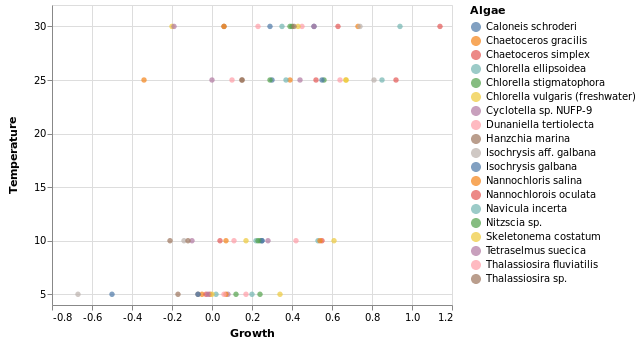

In [56]:
alt.Chart(df_jan[df_jan['Lux']==2500]).mark_circle().encode(
        alt.X('Growth', scale=alt.Scale(zero=False)),
        alt.Y('Temperature', scale=alt.Scale(zero=False, padding=1)),
        color='Algae',
        tooltip=['Algae',
                 'Temperature',
                 'Lux',
                 'Growth',
                 ]
    )

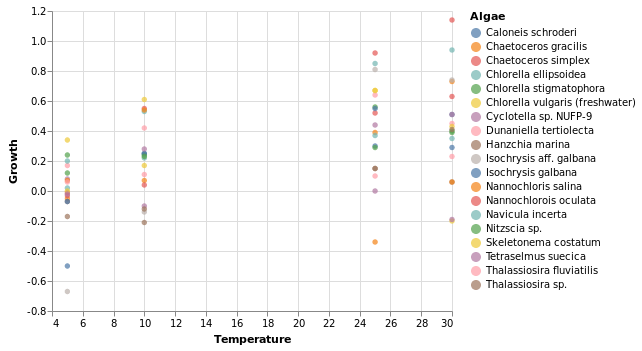

In [61]:
alt.Chart(df_jan[df_jan['Lux']==2500]).mark_circle().encode(
        alt.X('Temperature', scale=alt.Scale(zero=False)),
        alt.Y('Growth', scale=alt.Scale(zero=False, padding=1)),
        color='Algae',
        tooltip=['Algae',
                 'Temperature',
                 'Lux',
                 'Growth',
                 ]
    )

**Create a Grouped Bar Chart with a Slider that Controls `Lux` Values**

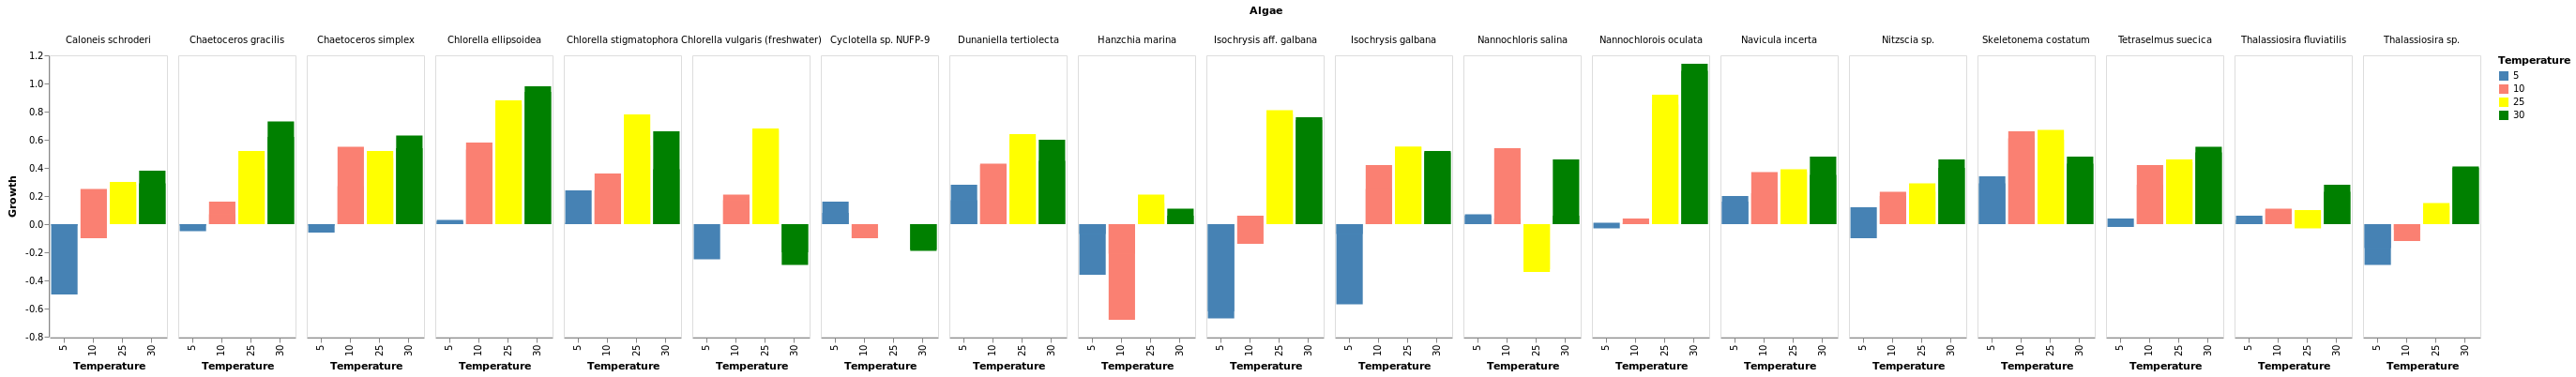

In [45]:
pink_blue = alt.Scale(domain=(5, 10, 25, 30),
                      range=["steelblue", "salmon", "yellow", "green"])

slider = alt.binding_range(min=2500, max=5000, step=2500)
select_lux = alt.selection_single(name="Lux", fields=['Lux'], bind=slider)

alt.Chart(df_jan).mark_bar().encode(
    x=alt.X('Temperature:N'),
    y=alt.Y('Growth:Q', scale=alt.Scale(domain=(-.75, 1.2)), axis=alt.Axis(grid=False)),
    color=alt.Color('Temperature:N', scale=pink_blue),
    column='Algae'
).properties(
    width=125
).add_selection(
    select_lux
).transform_filter(
    select_lux
)

**Plot Grouped Bar Charts without the Slider**

Plot of all values with Lux == 2500

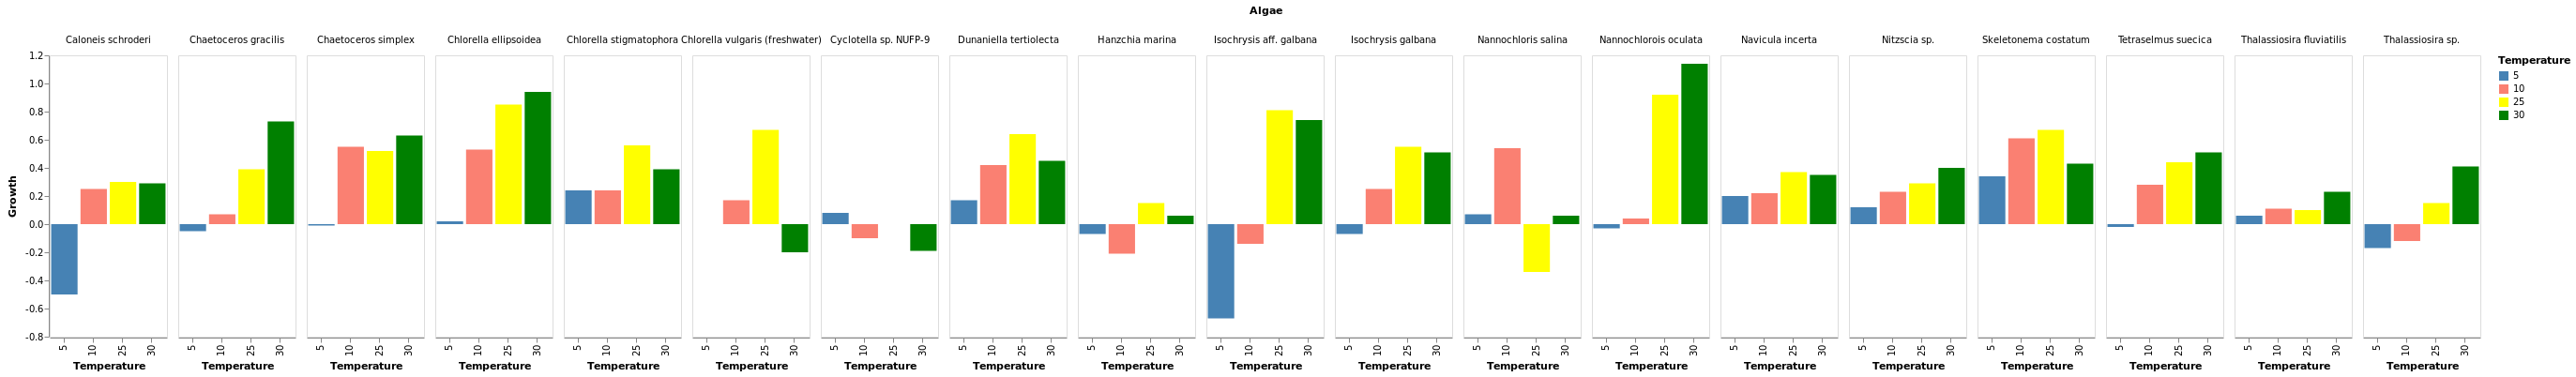

In [48]:
pink_blue = alt.Scale(domain=(5, 10, 25, 30),
                      range=["steelblue", "salmon", "yellow", "green"])

alt.Chart(df_jan[df_jan['Lux']==2500]).mark_bar().encode(
    x=alt.X('Temperature:N'),
    y=alt.Y('Growth:Q', scale=alt.Scale(domain=(-.75, 1.2)), axis=alt.Axis(grid=False)),
    color=alt.Color('Temperature:N', scale=pink_blue),
    column='Algae'
).properties(
    width=125
)

**Plot Grouped Bar Charts without the Slider**

Plot of all values with Lux == 5000

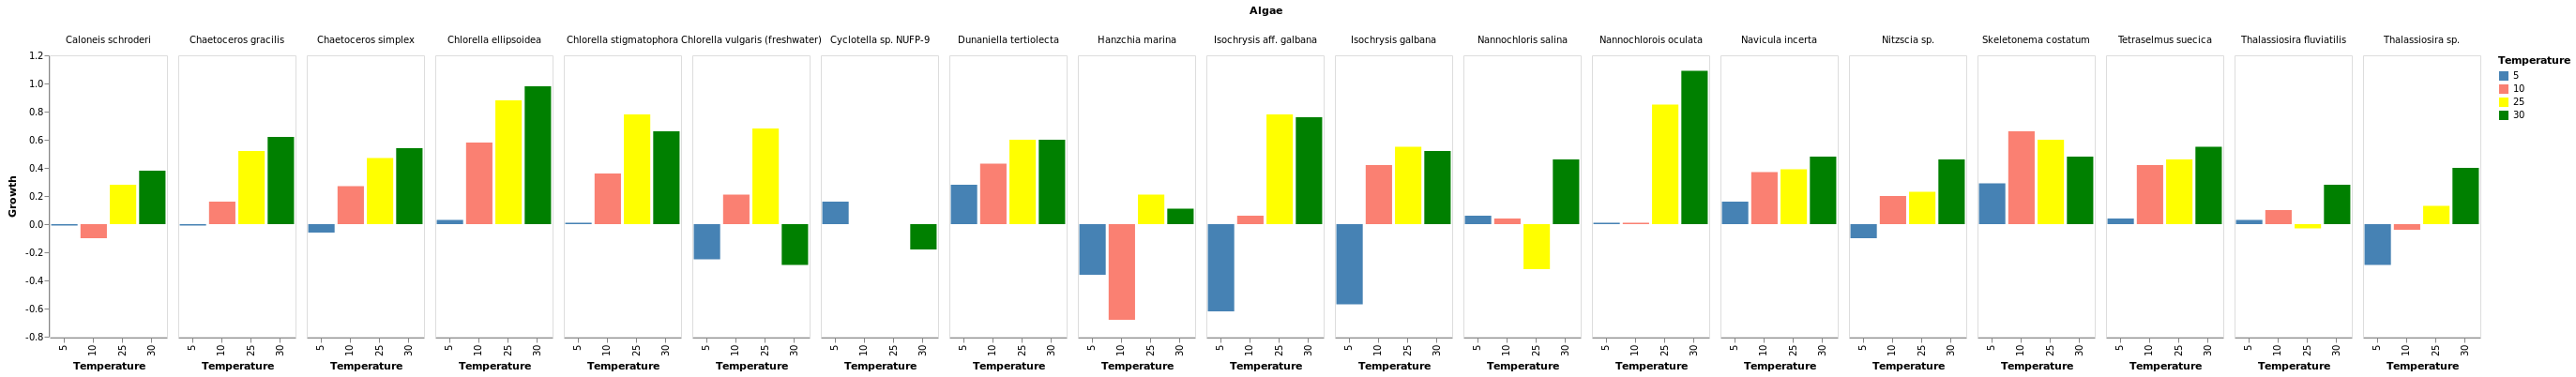

In [49]:
pink_blue = alt.Scale(domain=(5, 10, 25, 30),
                      range=["steelblue", "salmon", "yellow", "green"])

alt.Chart(df_jan[df_jan['Lux']==5000]).mark_bar().encode(
    x=alt.X('Temperature:N'),
    y=alt.Y('Growth:Q', scale=alt.Scale(domain=(-.75, 1.2)), axis=alt.Axis(grid=False)),
    color=alt.Color('Temperature:N', scale=pink_blue),
    column='Algae'
).properties(
    width=125
)

**Create a Multi-Line Highlight Chart**

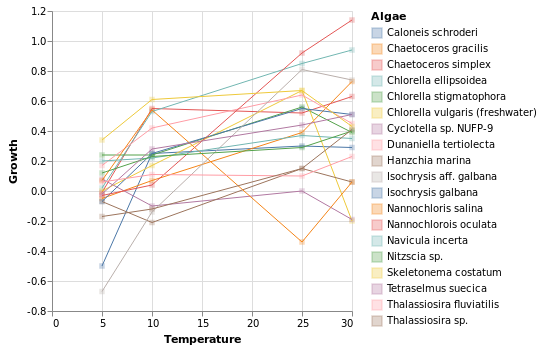

In [85]:
highlight = alt.selection(type='single', on='mouseover',
                         fields=['Algae'], nearest=True)

base = alt.Chart(df_jan[df_jan['Lux'] == 2500]).encode(
    x = 'Temperature',
    y = 'Growth',
    color = 'Algae',
    tooltip=['Algae',
         'Temperature',
         'Lux',
         'Growth',
         ],
)

points = base.mark_square().encode(
    opacity=alt.value(0.3)
).add_selection(
    highlight
).properties(
    width=300
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

points + lines

**Create a Multi-Line Highlight Chart with an Improved Tooltip**

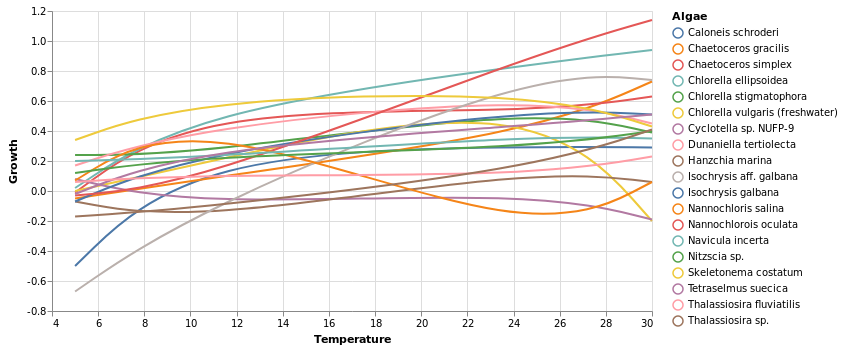

In [69]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Algae'], empty='none')

# The basic line
line = alt.Chart().mark_line(
    interpolate='basis').encode(
        x='Temperature:Q',
        y='Growth:Q',
        color='Algae:N',
    scale=Scale(domain=[])
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='Temperature:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Growth:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='Temperature:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=df_jan[df_jan['Lux'] == 2500], width=600, height=300)